# CLASIFICACION CON SVM Y NN

En la presente actividad se va a emplear un dataset que contiene información de características de celulares para clasificarlos en un rango de precios.

La información del *dataset* es:
* *battery_power*: Energía total que una batería puede almacenar en un tiempo medido en *mAh*
* *blue*: Indica si tiene *bluetooth* o no
* *clock_speed*: Velocidad del microprocesador
* *dual_sim*: Indica si tiene soporte dual de *sim* o no
* *fc*: Megapíxeles de la cámara frontal
* *four_g*: Indica si tiene 4G o no
* *int_memory*: Memoria interna en GB
* *m_dep*: Grosor del celular en cm
* *mobile_wt*: Peso del celular
* *n_cores*: Número de núcleos del procesador
* *pc*: Megapíxeles de la cámara principal
* *px_height*: Alto de la resolución de píxeles
* *px_width*: Ancho de resolución de píxeles
* *ram*: RAM en MB
* *sc_h*: Alto de la pantalla en cm
* *sc_w*: Ancho de la pantalla en cm
* *talk_time*: tiempo máximo que durará una sola carga de la batería
* *tres_g*: Indica si es 3G o no
* *touch_screen*: Indica si tiene pantalla táctil o no
* *wifi*: Indica si tiene wifi o no
* ***price_range***: Es la variable objetivo con valor 0 (bajo costo), 1 (costo medio), 2 (costo alto) y 3 (costo muy alto).

### IMPORTACIÓN DE LIBRERIAS A UTILIZAR

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### CARGA DEL DATASET

In [2]:
data = pd.read_csv('train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
#Tamaño del dataset
data.shape

(2000, 21)

In [4]:
#Información de las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# 1. ANÁLISIS DESCRIPTIVO DE DATOS


## Variables numéricas

In [5]:
#Resumen estadístico de las variables
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### **1.1. Escriba el código que permita crear la matriz de correlación de todas las variables numéricas:**

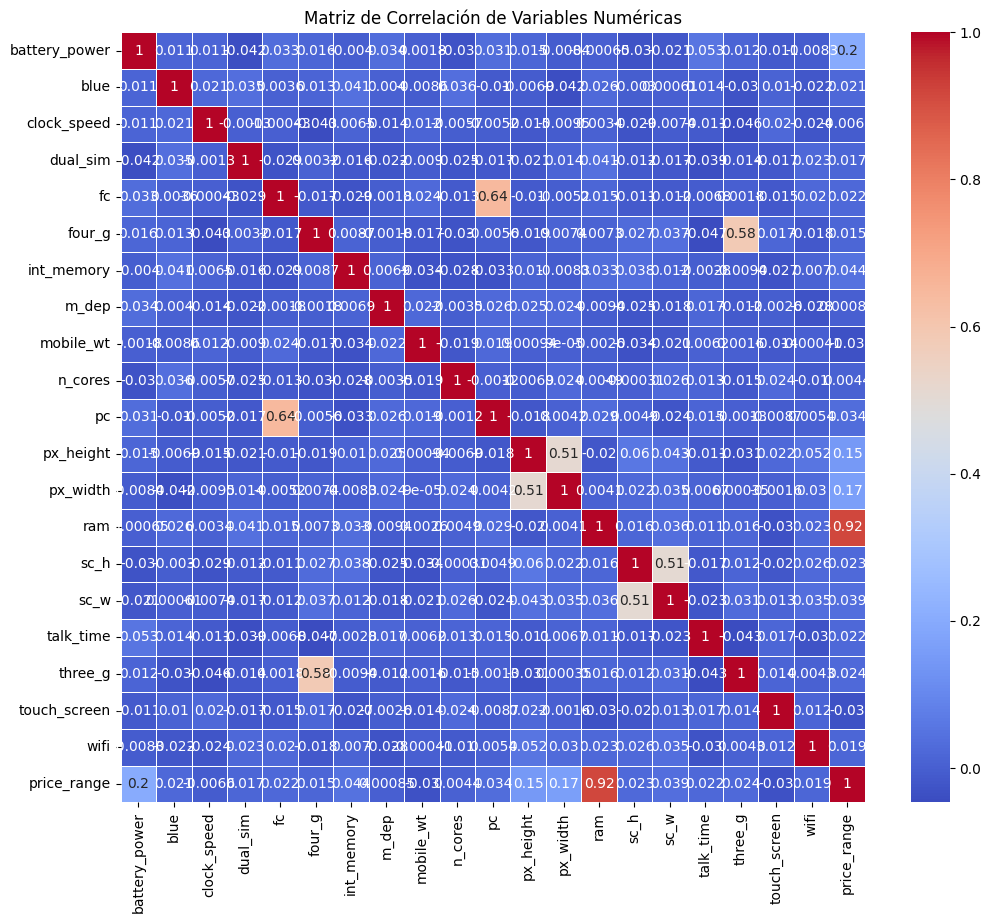

In [6]:
corr = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

## Variables catégoricas

### **1.2. Escriba el código para su análisis y la creación de gráficos de frecuencia:**

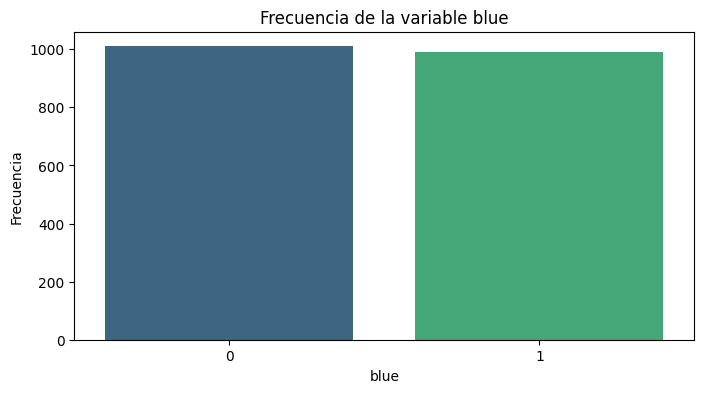

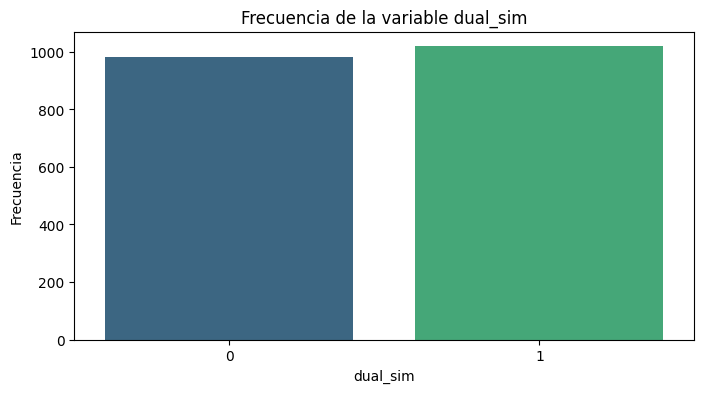

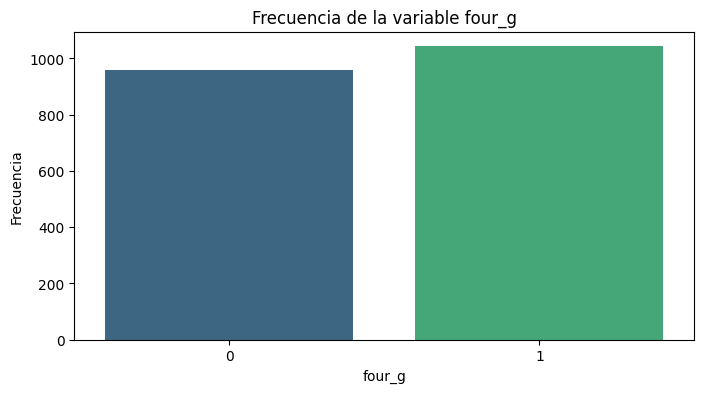

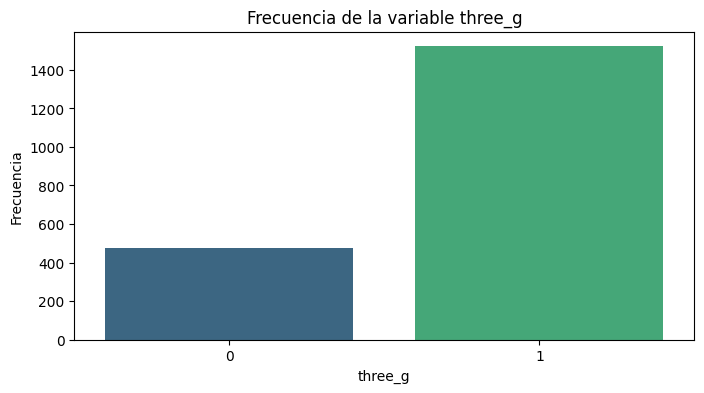

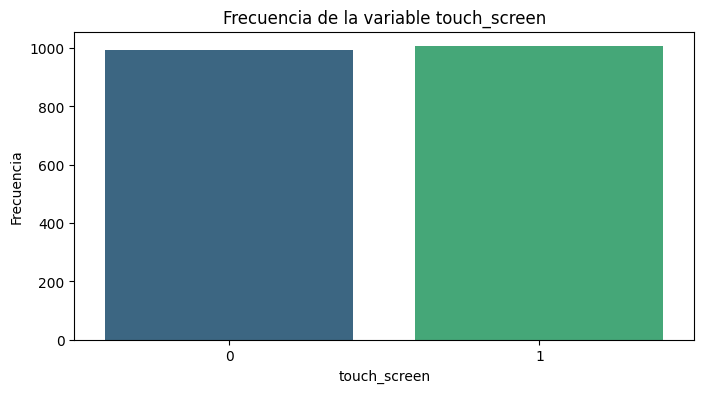

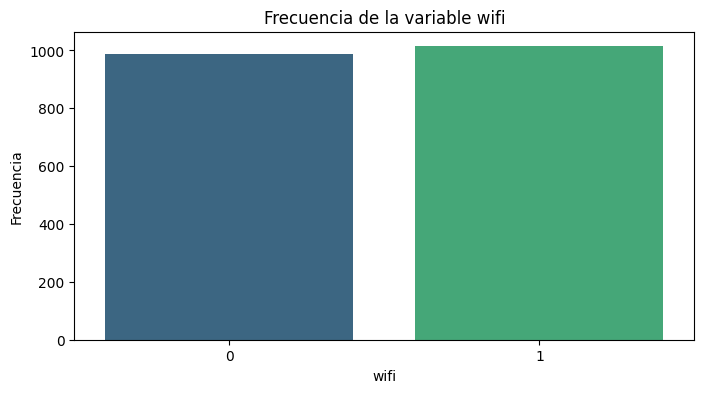

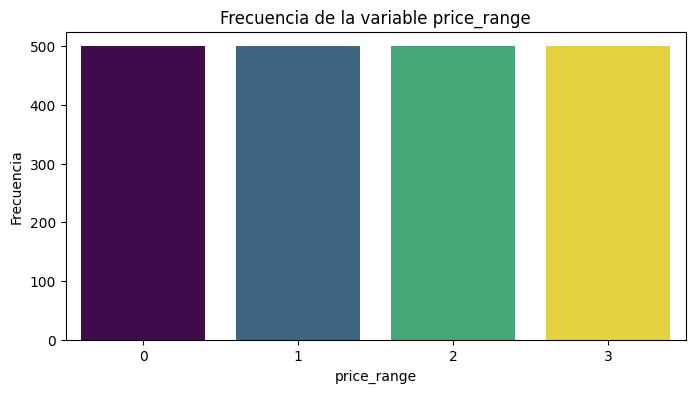

In [7]:
# Identificar las variables categóricas
categorical_columns = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']

# Análisis y gráficos de frecuencia para cada variable categórica
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, data=data, hue=column, legend=False, palette='viridis')
    plt.title(f'Frecuencia de la variable {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

### **1.3. Escriba el código que permita validar si el dataset está balanceado**

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


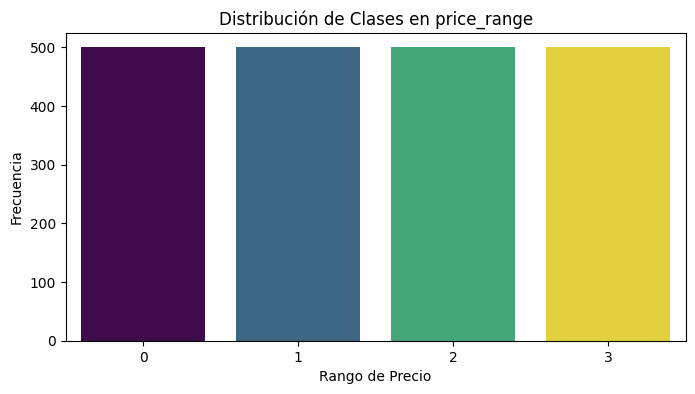

In [8]:
# Contar la frecuencia de cada clase en la variable objetivo
class_counts = data['price_range'].value_counts()

# Mostrar la cantidad de datos por clase
print(class_counts)

# Visualizar la distribución de la variable objetivo
plt.figure(figsize=(8, 4))
sns.countplot(x='price_range', data=data, hue='price_range', legend=False, palette='viridis')
plt.title('Distribución de Clases en price_range')
plt.xlabel('Rango de Precio')
plt.ylabel('Frecuencia')
plt.show()

## PREPROCESAMIENTO DE DATOS

In [9]:
#Crear una copia del dataset para modificaciones
data2 = data.copy()

In [10]:
#Verificar tamaño
data2.shape

(2000, 21)

### Escriba el código que permita reescalar todos los atributos del dataset utilizando la función del StandardScaler:

In [11]:
# Inicializar el StandardScaler
scaler = StandardScaler()

columnas_categoricas = ["price_range"]
# Se remueve las clases categóricas para especificar las columnas que se van a entrenar
fit_columns = data2.drop(columns = columnas_categoricas)

data2[fit_columns.columns] = scaler.fit_transform(fit_columns)
data2.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,1
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,2
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,2
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,2
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,1
5,1.412405,-0.990050,-1.253064,0.981177,-0.301703,-1.043966,-0.553795,0.687548,0.671107,-1.539175,...,0.808917,0.931480,-0.974874,1.114266,-1.094526,-0.185077,0.559641,-1.006018,-1.014099,1
6,1.325906,-0.990050,0.217884,-1.019184,-0.071307,0.957886,-1.215274,1.034357,-0.035292,1.521249,...,-0.595280,-0.540431,1.010444,0.164641,0.512708,1.279430,0.559641,-1.006018,0.986097,3
7,1.628654,-0.990050,-1.253064,0.981177,-0.992890,-1.043966,-0.443549,1.034357,1.320993,-0.227564,...,-0.300016,-0.237254,-1.313291,0.876859,-0.635317,-1.100394,0.559641,0.994018,0.986097,0
8,0.470015,1.010051,-1.253064,-1.019184,-0.992890,-1.043966,1.155024,0.687548,0.953666,1.084046,...,-0.584011,-0.961638,-0.945367,1.114266,-1.094526,1.645557,0.559641,-1.006018,-1.014099,0
9,-1.660607,1.010051,-1.130485,0.981177,-0.532099,0.957886,-1.270397,-1.393304,-1.335064,0.209639,...,1.108689,-0.063680,-1.485727,1.589078,0.971917,0.181050,0.559641,-1.006018,-1.014099,0


# 2. Aplicación de SVM sobre los datos


In [12]:
# Separación de los datos en train y test
X = data2.drop(columns = 'price_range', axis=1)
y = data2['price_range']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

### **2.1. Escriba el código que permita crear un modelo utilizando SVM con kernel lineal, el valor de C =1 y la semilla aleatoria es de 1234:**

In [13]:
# Creación del modelo SVM lineal
modeloSVM = SVC(kernel='linear', C=1, random_state=1234)

In [14]:
# Entrenar el modelo
modeloSVM.fit(X_train, y_train)
# Predicciones test
predictSVM = modeloSVM.predict(X_test)
predictSVM

array([1, 3, 3, 0, 3, 3, 1, 0, 0, 1, 0, 1, 3, 1, 1, 3, 0, 3, 2, 1, 1, 0,
       0, 3, 2, 2, 3, 2, 2, 1, 0, 1, 0, 1, 2, 3, 1, 2, 1, 1, 2, 3, 2, 1,
       1, 0, 0, 2, 2, 0, 3, 1, 2, 1, 0, 2, 0, 0, 2, 3, 1, 0, 2, 1, 2, 2,
       0, 2, 3, 1, 3, 1, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 3, 2, 2, 1, 2, 0,
       0, 2, 2, 2, 1, 2, 3, 0, 0, 1, 0, 3, 2, 1, 3, 3, 1, 1, 3, 2, 3, 3,
       2, 2, 3, 2, 3, 3, 3, 0, 1, 3, 2, 2, 3, 0, 1, 1, 3, 2, 2, 1, 3, 0,
       3, 1, 0, 2, 2, 3, 1, 3, 2, 2, 3, 1, 3, 2, 2, 0, 0, 1, 1, 3, 2, 0,
       3, 3, 3, 0, 0, 0, 2, 0, 1, 3, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 0,
       2, 0, 2, 2, 2, 3, 1, 0, 3, 3, 0, 1, 1, 2, 2, 1, 2, 3, 0, 3, 1, 2,
       3, 1, 1, 1, 0, 3, 2, 3, 1, 3, 3, 2, 3, 2, 3, 1, 1, 0, 0, 1, 2, 1,
       0, 1, 1, 2, 2, 0, 3, 1, 2, 1, 0, 3, 3, 2, 1, 2, 2, 2, 1, 0, 0, 2,
       3, 2, 2, 1, 1, 3, 2, 3, 0, 1, 2, 2, 0, 2, 3, 0, 3, 0, 3, 0, 2, 0,
       2, 2, 2, 1, 3, 1, 0, 0, 1, 0, 3, 1, 2, 2, 3, 3, 3, 2, 3, 3, 1, 1,
       1, 2, 2, 3, 2, 2, 3, 3, 1, 2, 2, 1, 2, 1, 1,

### **2.2. Escriba el código que permita hallar la exactitud (accuracy) del modelo SVM anteriormente entrenado:**

In [15]:
# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, predictSVM)

# Mostrar la exactitud
print(f'Exactitud del modelo SVM: {accuracy:.2f}')

Exactitud del modelo SVM: 0.95


### **2.3. Escriba el código que permita encontrar los mejores parámetros para el modelo  SVM, con un param_grid = {'C': np.linspace(0.1, 100, 200), 'kernel': ('linear', 'rbf')**

#### Tunear hiperparámetros

In [16]:
# Definir el grid de parámetros
param_grid = {
    'C': np.linspace(0.1, 100, 200),
    'kernel': ['linear', 'rbf']
}

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=modeloSVM, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3, refit=True)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor exactitud obtenida: {grid_search.best_score_:.2f}")

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.950 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.934 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.947 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.934 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.931 total time=   0.0s
[CV 3/5] END C=0.6020100502512563, kernel=linear;, score=0.956 total time=   0.0s
[CV 2/5] END C=0.6020100502512563, kernel=linear;, score=0.931 total time=   0.0s
[CV 1/5] END C=0.6020100502512563, kernel=linear;, score=0.963 total time=   0.0s
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.641 total time=   0.1s
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.634 total time=   0.1s
[CV 5/5] END C=0.6020100502512563, kernel=linear;, score=0.959 total time=   0.0s
[CV 4/5] END C=0.6020100502512563, kernel

### **2.4. Escriba el código que permita conocer los mejores parámetros encontrados en el ítem anterior**

In [17]:
mejores_parametros = grid_search.best_params_
mejor_exactitud = grid_search.best_score_

print(f"Mejores parámetros encontrados: {mejores_parametros}")
print(f"Mejor exactitud obtenida durante la búsqueda: {mejor_exactitud:.3f}")

Mejores parámetros encontrados: {'C': np.float64(20.180402010050255), 'kernel': 'linear'}
Mejor exactitud obtenida durante la búsqueda: 0.971


### **2.5. Escriba el código que permita hallar la exactitud del modelo de SVM aplicando los mejores parámetros**

In [18]:
# Accuracy de test del modelo
# Entrenar el modelo SVM con los mejores parámetros encontrados
mejor_modelo_svm = SVC(**grid_search.best_params_)
mejor_modelo_svm.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred_mejor = mejor_modelo_svm.predict(X_test)
# ==============================================================================
accuracy = accuracy_score(y_test, y_pred_mejor)

# Mostrar la exactitud
print(f'Exactitud del modelo SVM con los mejores parámetros: {accuracy:.3f}')

Exactitud del modelo SVM con los mejores parámetros: 0.965


### **2.6. Escriba el código que permita hallar la las métricas del modelo entrenado en el ítem anterior. Utilice la función classification_report**

In [19]:
# Obtener el reporte de clasificación
reporte = classification_report(y_test, y_pred_mejor)

# Mostrar el reporte de clasificación
print("Reporte de Clasificación del Modelo SVM con los Mejores Parámetros:")
print(reporte)

Reporte de Clasificación del Modelo SVM con los Mejores Parámetros:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        87
           1       0.96      0.94      0.95       100
           2       0.95      0.97      0.96       116
           3       0.98      0.98      0.98        97

    accuracy                           0.96       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.96      0.96       400



# 3. REDES NEURONALES

### **3.1. Escriba el código que permita entrenar un perceptrón multicapa con 3 capas ocultas con 200, 100 y 50 neuronas respectivamente en cada capa. Función de activación 'Relu' y random_state=1**

In [20]:
# Crear el modelo MLP con 3 capas ocultas
mlp_model = MLPClassifier(hidden_layer_sizes=(200, 100, 50), 
                          activation='relu', 
                          random_state=1, 
                          max_iter=1000)

# Entrenar el modelo
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=1000, random_state=1)

### **3.2. Escriba el código que permita hallar la exactitud del modelo de redes neuronales anteriormente entrenado:**

In [21]:
# Predecir sobre el conjunto de prueba
y_pred_mlp = mlp_model.predict(X_test)

# Calcular la exactitud del modelo
exactitud_mlp = accuracy_score(y_test, y_pred_mlp)

# Mostrar la exactitud y reporte de clasificación
print(f'Exactitud del modelo MLP: {exactitud_mlp:.3f}')

Exactitud del modelo MLP: 0.925


### **3.3. Escriba el código que permita hallar la las métricas del modelo entrenado en el ítem anterior. Utilice la función classification_report**

### 4. **Conclusiones**

Comparando los resultados obtenidos con los diferentes modelos podemos observar lo siguiente:

- **Modelo SVM inicial**: el modelo SVM entrenado con un kernel lineal y un valor de regularización C=1 logró una precisión de 0,95. Este rendimiento ya era bastante alto, lo que indica que el modelo podía clasificar correctamente la mayoría de las instancias en el conjunto de prueba.
- **Modelo SVM optimizado**: Después de ajustar los parámetros usando GridSearchCV con una búsqueda más exhaustiva (C variando entre 0.1 y 100, con 20 valores posibles y usando tanto kernel lineal como RBF), los mejores parámetros resultaron ser C = 20,18 y kernel = 'linear'. Con esta configuración, la precisión del modelo mejoró a 0,971, lo que supone una mejora significativa con respecto al modelo inicial. Esto sugiere que el ajuste de hiperparámetros permitió que el modelo SVM capturara mejor las complejidades del conjunto de datos.
- **Modelo de red neuronal**: el perceptrón multicapa (MLP) con tres capas ocultas (200, 100, 50 neuronas) logró una precisión de 0,9250. Aunque este modelo también mostró un buen rendimiento, su precisión es ligeramente menor que la del modelo SVM original y optimizado. Esto podría deberse a la arquitectura específica utilizada o a la naturaleza del conjunto de datos, que podría adaptarse mejor a un clasificador lineal como SVM que a una red neuronal profunda.

#### Resumen
En resumen, se descubrió que el modelo SVM optimizado es el más eficaz para este conjunto de datos, superando tanto al modelo SVM inicial como al modelo de red neuronal. Esta mejora resalta la importancia de realizar una búsqueda exhaustiva de hiperparámetros, ya que el ajuste fino puede conducir a un rendimiento significativamente mejor en las tareas de clasificación.